In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install tensorflow-gpu==2.5.0

In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
from sklearn.model_selection import train_test_split
import cv2
from keras.utils import np_utils


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/AI_DATA/emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("/content/drive/MyDrive/AI_DATA/emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("/content/drive/MyDrive/AI_DATA/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)
print("Train: %s, Test: %s, Map: %s" %(train.shape, test.shape, mapp.shape))

Train: (112799, 785), Test: (18799, 785), Map: (47,)


In [ ]:
# Constants
HEIGHT = 28
WIDTH = 28

In [ ]:
# Split x and y
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
del train

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]
del test

In [ ]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


(112799, 784) (112799,) (18799, 784) (18799,)


In [ ]:
def rotate(image):
    image = image.reshape([HEIGHT, WIDTH])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [ ]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 28, 28)
test_x: (18799, 28, 28)


In [ ]:
# Normalise
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

In [ ]:
# number of classes
num_classes = train_y.nunique()

In [ ]:
# One hot encoding
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (112799, 47)
test_y:  (18799, 47)


In [ ]:
# Reshape image for CNN
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)

In [ ]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=0)

In [57]:
# Building model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

In [ ]:
model = Sequential()




model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=(HEIGHT, WIDTH,1)))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(train_x, train_y, epochs=10, batch_size=128,validation_data=(val_x, val_y),callbacks=[early_stop], verbose=1)




Epoch 1/10
794/794 [==============================] - 307s 386ms/step - loss: 1.3089 - accuracy: 0.6145 - val_loss: 0.4959 - val_accuracy: 0.8311
Epoch 2/10
794/794 [==============================] - 307s 387ms/step - loss: 0.6498 - accuracy: 0.7876 - val_loss: 0.4234 - val_accuracy: 0.8460
Epoch 3/10
794/794 [==============================] - 309s 389ms/step - loss: 0.5594 - accuracy: 0.8146 - val_loss: 0.4123 - val_accuracy: 0.8542
Epoch 4/10
794/794 [==============================] - 307s 386ms/step - loss: 0.5043 - accuracy: 0.8306 - val_loss: 0.3797 - val_accuracy: 0.8609
Epoch 5/10
794/794 [==============================] - 306s 385ms/step - loss: 0.4776 - accuracy: 0.8373 - val_loss: 0.3586 - val_accuracy: 0.8693
Epoch 6/10
794/794 [==============================] - 304s 383ms/step - loss: 0.4493 - accuracy: 0.8462 - val_loss: 0.3435 - val_accuracy: 0.8768
Epoch 7/10
794/794 [==============================] - 306s 385ms/step - loss: 0.4356 - accuracy: 0.8498 - val_loss: 0.3453 -

In [ ]:
model.save("model1.h5")

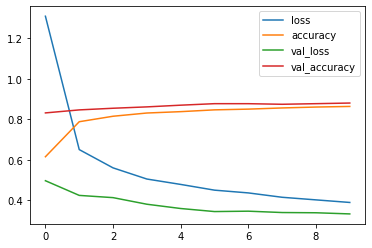

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
model.evaluate(test_x, test_y, verbose=0)  

[0.35734817385673523, 0.8771743178367615]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict_classes(test_x)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_y.shape

(18799, 47)

In [ ]:
test_y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

39

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(HEIGHT, WIDTH))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x =x.reshape(-1, HEIGHT, WIDTH, 1)
  images = np.vstack([x])
  pred = np.argmax(model.predict(x), axis=-1)
  class_pred=pred.max()
  print(fn)
  print(class_pred)

In [54]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, 1)))
model2.add(MaxPool2D(strides=2))
model2.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model2.add(MaxPool2D(strides=2))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(84, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 48)        38448     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               307456    
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

In [58]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop2 = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('LesNetmodel.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [60]:
model2.fit(train_x, train_y, epochs=20, batch_size=32,validation_data=(val_x, val_y),callbacks=[early_stop2,mcp_save], verbose=1)


Epoch 1/20
3173/3173 [==============================] - 118s 37ms/step - loss: 0.6346 - accuracy: 0.7943 - val_loss: 0.4049 - val_accuracy: 0.8568

Epoch 00001: val_loss improved from inf to 0.40493, saving model to LesNetmodel.h5
Epoch 2/20
3173/3173 [==============================] - 118s 37ms/step - loss: 0.3715 - accuracy: 0.8670 - val_loss: 0.3645 - val_accuracy: 0.8677

Epoch 00002: val_loss improved from 0.40493 to 0.36452, saving model to LesNetmodel.h5
Epoch 3/20
3173/3173 [==============================] - 117s 37ms/step - loss: 0.3194 - accuracy: 0.8817 - val_loss: 0.3413 - val_accuracy: 0.8728

Epoch 00003: val_loss improved from 0.36452 to 0.34126, saving model to LesNetmodel.h5
Epoch 4/20
3173/3173 [==============================] - 116s 37ms/step - loss: 0.2829 - accuracy: 0.8931 - val_loss: 0.3465 - val_accuracy: 0.8775

Epoch 00004: val_loss did not improve from 0.34126
Epoch 5/20
3173/3173 [==============================] - 117s 37ms/step - loss: 0.2563 - accuracy: 0.